# Objective is to Work on creating own library to run the Assignment-14:
1. Convert your code such that you have 4 additional files in the below 4 folders:
    1. data
    2. loss
    3. model
    4. optim_scheduler
2. Use these files to import related functions to train your model. The ipynb files can only have training loop, and everything else must be imported. 
    Reference:https://github.com/rwightman/pytorch-image-models/tree/master/timm



In [1]:
import numpy as np
import time, math
from tqdm import tqdm_notebook as tqdm

import tensorflow as tf
import tensorflow.contrib.eager as tfe

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
tf.enable_eager_execution()

In [3]:
!git clone -q https://github.com/vinayakumarvs/repo.git
import repo as fl

Using TensorFlow backend.


In [0]:
BATCH_SIZE =  512#@param {type:"integer"}
MOMENTUM = 0.9 #@param {type:"number"}
LEARNING_RATE = 0.4 #@param {type:"number"}
WEIGHT_DECAY = 5e-4 #@param {type:"number"}
EPOCHS =  24#@param {type:"integer"}

In [5]:
data_set = fl.DataSet()
train_file, test_file = data_set.get_tf_records('cifar10')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ../content/drive/


In [6]:
len_train = fl.get_tf_record_count(train_file)
len_test = fl.get_tf_record_count(test_file)
print(len_train, len_test)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
50000 10000


In [0]:
model = fl.DavidNet()
global_step = tf.train.get_or_create_global_step()
lr = fl.OneCycleLR(EPOCHS, LEARNING_RATE, BATCH_SIZE, len_train)
lr_fun = lr.get_lr_fun(global_step)

opt = tf.train.MomentumOptimizer(lr_fun, momentum=MOMENTUM, use_nesterov=True)

In [8]:
t = time.time()

# Store Results
train_loss_results = []
test_loss_results = []
train_accuracy_results = []
test_accuracy_results = []

for epoch in range(EPOCHS):
  train_loss = test_loss = train_acc = test_acc = 0.0
  train_set = fl.input_fn(train_file, BATCH_SIZE)
  
  tf.keras.backend.set_learning_phase(1)
  for (x, y) in tqdm(train_set):
    with tf.GradientTape() as tape:
      loss, correct = model(x, y)

    var = model.trainable_variables
    grads = tape.gradient(loss, var)
    for g, v in zip(grads, var):
      g += v * WEIGHT_DECAY * BATCH_SIZE
    opt.apply_gradients(zip(grads, var), global_step=global_step)

    train_loss += loss.numpy()
    train_acc += correct.numpy()
  
  tf.keras.backend.set_learning_phase(0)
  test_set = fl.input_fn(file_names = test_file, batch_size = BATCH_SIZE, is_train_file = False)
  for (x, y) in test_set:
    loss, correct = model(x, y)
    test_loss += loss.numpy()
    test_acc += correct.numpy()

  train_loss_results.append(train_loss / len_train)
  test_loss_results.append(test_loss / len_test)

  train_accuracy_results.append(train_acc / len_train)
  test_accuracy_results.append(test_acc / len_test)
  
  print('epoch:', epoch+1, 'lr:', lr.get_lr() , 'train loss:', train_loss / len_train, 'train acc:', train_acc / len_train, 'val loss:', test_loss / len_test, 'val acc:', test_acc / len_test, 'time:', time.time() - t)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.



epoch: 1 lr: 0.07918367346938776 train loss: 1.6799596270751953 train acc: 0.39012 val loss: 1.2777351104736328 val acc: 0.5485 time: 70.98039722442627



epoch: 2 lr: 0.15918367346938778 train loss: 0.9730783453369141 train acc: 0.65294 val loss: 0.7817223022460937 val acc: 0.7254 time: 119.93253350257874



epoch: 3 lr: 0.23918367346938776 train loss: 0.7661101501464844 train acc: 0.73046 val loss: 0.7262350357055664 val acc: 0.7519 time: 169.07048153877258



epoch: 4 lr: 0.31918367346938775 train loss: 0.6697724127197265 train acc: 0.76672 val loss: 0.6065095748901367 val acc: 0.7961 time: 217.88996696472168



epoch: 5 lr: 0.3991836734693877 train loss: 0.6066704721069336 train acc: 0.78966 val loss: 0.9027229156494141 val acc: 0.7469 time: 267.4515745639801



epoch: 6 lr: 0.3791621911922664 train loss: 0.5055874479675293 train acc: 0.82592 val loss: 0.49672650451660155 val acc: 0.836 time: 317.0298101902008



epoch: 7 lr: 0.35810955961331903 train loss: 0.42326727172851564 train acc: 0.85454 val loss: 0.45014529876708986 val acc: 0.8517 time: 366.22118401527405



epoch: 8 lr: 0.3370569280343717 train loss: 0.3614526113891602 train acc: 0.8741 val loss: 0.45492134399414064 val acc: 0.8508 time: 415.0680179595947



epoch: 9 lr: 0.31600429645542427 train loss: 0.32359440246582033 train acc: 0.88766 val loss: 0.4533170303344727 val acc: 0.8507 time: 463.7247130870819



epoch: 10 lr: 0.29495166487647695 train loss: 0.2845278280639648 train acc: 0.9001 val loss: 0.48667457275390624 val acc: 0.8403 time: 512.2918932437897



epoch: 11 lr: 0.2738990332975295 train loss: 0.2511093913269043 train acc: 0.91156 val loss: 0.3731279914855957 val acc: 0.876 time: 560.7968015670776



epoch: 12 lr: 0.2528464017185822 train loss: 0.2265753466796875 train acc: 0.92134 val loss: 0.3490206283569336 val acc: 0.8884 time: 608.9118905067444



epoch: 13 lr: 0.2317937701396348 train loss: 0.20113113960266113 train acc: 0.92984 val loss: 0.3699442008972168 val acc: 0.8795 time: 657.0723977088928



epoch: 14 lr: 0.21074113856068744 train loss: 0.17797459274291993 train acc: 0.93866 val loss: 0.3611991897583008 val acc: 0.8827 time: 705.0994141101837



epoch: 15 lr: 0.18968850698174008 train loss: 0.15454208587646484 train acc: 0.94564 val loss: 0.36227300186157224 val acc: 0.8847 time: 753.157014131546



epoch: 16 lr: 0.1686358754027927 train loss: 0.13698148796081544 train acc: 0.95246 val loss: 0.33811726226806643 val acc: 0.8962 time: 801.0581045150757



epoch: 17 lr: 0.14758324382384536 train loss: 0.11963581100463867 train acc: 0.95888 val loss: 0.33372274703979493 val acc: 0.8983 time: 848.971836566925



epoch: 18 lr: 0.12653061224489803 train loss: 0.10658236465454102 train acc: 0.96324 val loss: 0.2968617469787598 val acc: 0.9082 time: 896.6773438453674



epoch: 19 lr: 0.10547798066595065 train loss: 0.09673506122589111 train acc: 0.96696 val loss: 0.3081880355834961 val acc: 0.9043 time: 944.3775713443756



epoch: 20 lr: 0.08442534908700328 train loss: 0.08281532302856445 train acc: 0.97206 val loss: 0.28518179092407225 val acc: 0.9135 time: 992.0826935768127



epoch: 21 lr: 0.0633727175080559 train loss: 0.07180339221954346 train acc: 0.97654 val loss: 0.28372182998657225 val acc: 0.9142 time: 1039.8350176811218



epoch: 22 lr: 0.04232008592910852 train loss: 0.06536006385803222 train acc: 0.9786 val loss: 0.2824266876220703 val acc: 0.9161 time: 1087.3925139904022



epoch: 23 lr: 0.021267454350161197 train loss: 0.056541371688842774 train acc: 0.98244 val loss: 0.2734565269470215 val acc: 0.9191 time: 1135.0732717514038



epoch: 24 lr: 0.00021482277121381843 train loss: 0.05224862760543823 train acc: 0.9843 val loss: 0.2662873092651367 val acc: 0.9226 time: 1182.7505345344543


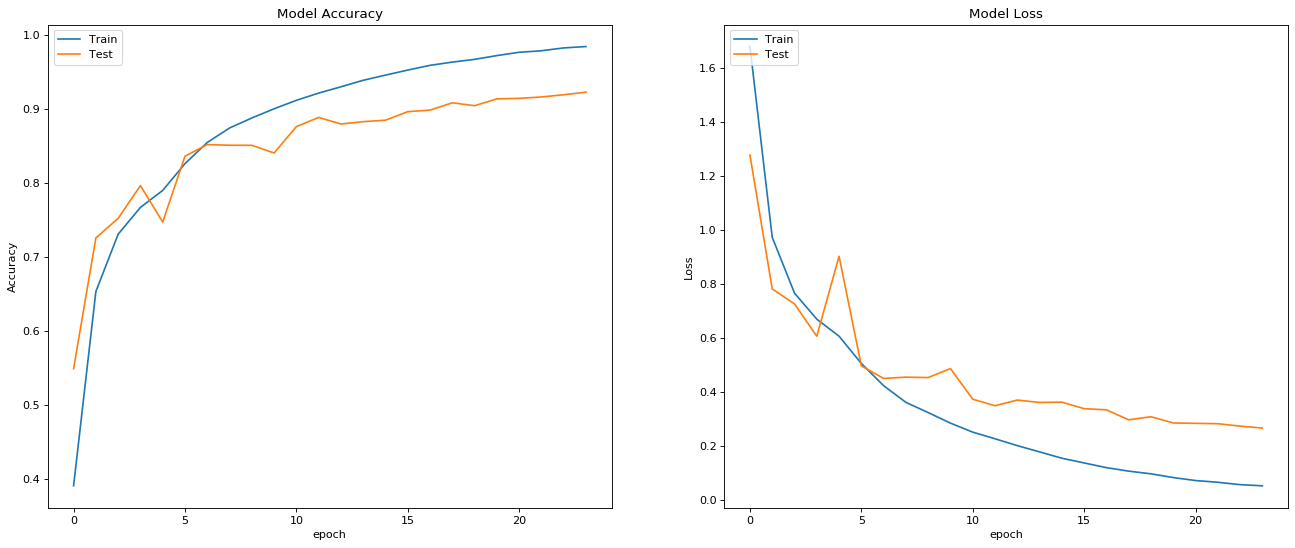

Best Accuracy is 0.9226


In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')

# Accuracy Summarization
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_results)
plt.plot(test_accuracy_results)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Loss Summarization
plt.subplot(1, 2, 2)
plt.plot(train_loss_results)
plt.plot(test_loss_results)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print('Best Accuracy is {}'.format(np.amax(test_accuracy_results)))